# Toma de Decisiones 2020

### Profesor: Guillermo Solovey

---

#### Alumno: Leandro Carreira
#### LU: 669/18

---

# Guía 5

# Ejercicio 7

(avanzado). La **capacidad metaconitiva** de un participante puede definirse como la correspondencia entre la ***certeza de la respuesta*** y la ***confianza reportada***.

Una de las formas de medirla es usando una **curva ROC de tipo 2** en la que “hits” corresponde a reportar alta confianza en los trials correctos y baja confianza en los trials incorrectos.

Más detalles y código en el paper [How to measure metacognition](https://www.frontiersin.org/articles/10.3389/fnhum.2014.00443/full#T1).

Con los datos obtenidos de cada participante **medir el area bajo la curva ROC de tipo 2**.

Luego **hacer un histograma de los valores obtenidos**.

# Resolución:

## Limpieza de datos:

Para elegir cuántos valores descartar, visualicé el **promedio de las respuestas correctas** a medida que movía el punto de inicio.

A partir del resultado número 50 se observó una estabilización del mismo ($\approx 0.722$), por lo que se eligió como valor final.

In [1]:
datos <- read.csv('./datos.csv', header=TRUE, sep=",")

In [2]:
stability.thr <- 50
max.rt.thr  <- 5000
datos.clean <- datos[datos$trial >= stability.thr & datos$rt <= max.rt.thr, ]

In [3]:
head(datos.clean)

,subject,trial,dots_left,dots_right,correct,rt,confidence
50,1,50,50,60,TRUE,4056,1
51,1,51,50,58,TRUE,895,3
52,1,52,58,50,TRUE,1603,2
53,1,53,50,56,TRUE,979,3
54,1,54,50,56,TRUE,912,4
55,1,55,54,50,TRUE,922,4


## Generación de Curva ROC tipo 2

|**Type I decision**|**High confidence**|**Low confidence**|
|--|--|--|
|Correct|Type 2 hit (H2)|Type 2 miss (M2)|
|Incorrect|Type 2 false alarm (FA2)|Type 2 correct rejection (CR2)|

$$\text{Table 1. Classification of responses within type 2 signal detection theory.}$$

Para cada valor de confianza (6 en nuestro experimento), lo elijo como *threshold* que define frontera entre baja y alta confianza.

De esta forma, itero sobre cada uno, obteniendo así 6 valores distintos de
* **Hits de tipo 2** (`hi.2`): Proporción de **respuestas correctas con alta confianza**.
* **Falsas alarmas de tipo 2** (`fa.2`): Proporción de **respuestas incorrectas con alta confianza**.

Observar que agrego un **séptimo valor** que corresponde a alguno de las fronteras donde **todos** los valores de cofianza están por debajo o por encima de ella (me aseguro que el $(0,0)$ y el $(1,1)$ existan en la curva ROC2)

In [4]:
m <- length(unique(datos$confidence)) + 1
hi.2 <- rep(NA, m)
fa.2 <- rep(NA, m)
ROC.2 <- data.frame(c1=rep(NA, 2),c2=rep(NA, 2),c3=rep(NA, 2),
                    c4=rep(NA, 2),c5=rep(NA, 2),c6=rep(NA, 2),
                    c7=rep(NA, 2))

### 1. Primer caso:

Curva ROC2 generalizada **para todos los sujetos al mismo tiempo**, sin distinción (código más claro).

*Ver caso 2 y 3 para análisis individual por sujeto.*

In [5]:
# Para cada nivel de confianza divido entre baja y alta confianza
confi <- c('c1','c2','c3','c4','c5','c6','c7')
for(c in 1:6){
    hi.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==T)/sum(datos.clean$correct==T)
    fa.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==F)/sum(datos.clean$correct==F)
    ROC.2[1, confi[c]] <- hi.2[c]
    ROC.2[2, confi[c]] <- fa.2[c]
}
# Agrego el (0,0)
hi.2[7] <- 0
fa.2[7] <- 0
ROC.2[1, 'c7'] <- hi.2[7]
ROC.2[2, 'c7'] <- fa.2[7]

In [6]:
rownames(ROC.2) <- c('HI2', 'FA2')
ROC.2

,c1,c2,c3,c4,c5,c6,c7
HI2,1,0.9142649,0.7686976,0.5297337,0.3181321,0.11856987,0
FA2,1,0.8438697,0.6139847,0.3793103,0.1714559,0.04980843,0


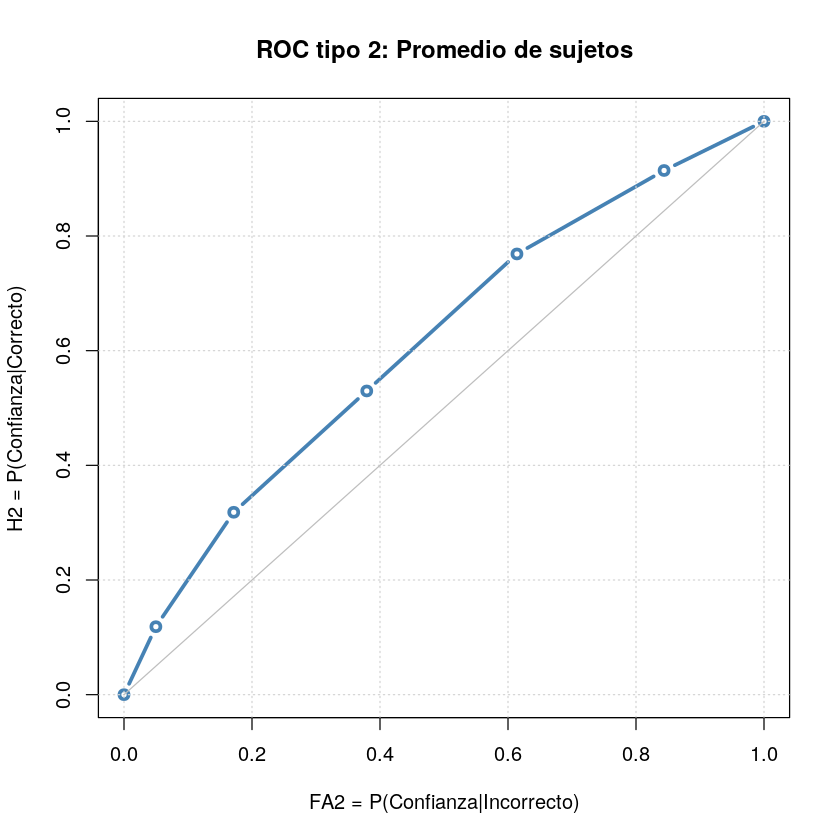

In [7]:
plot(fa.2, hi.2, type='b', lwd=3, col="steelblue", xlim=c(0,1), ylim=c(0,1),
     main="ROC tipo 2: Promedio de sujetos",
     xlab="FA2 = P(Confianza|Incorrecto)", ylab="H2 = P(Confianza|Correcto)")
grid()
lines(x=c(min(fa.2), max(fa.2)), y=c(min(hi.2),max(hi.2)), col='gray')

### 2. Segundo caso:

Curva ROC2 individualizada **para cada sujeto**.

Por simplicidad, muestro primeros 9.

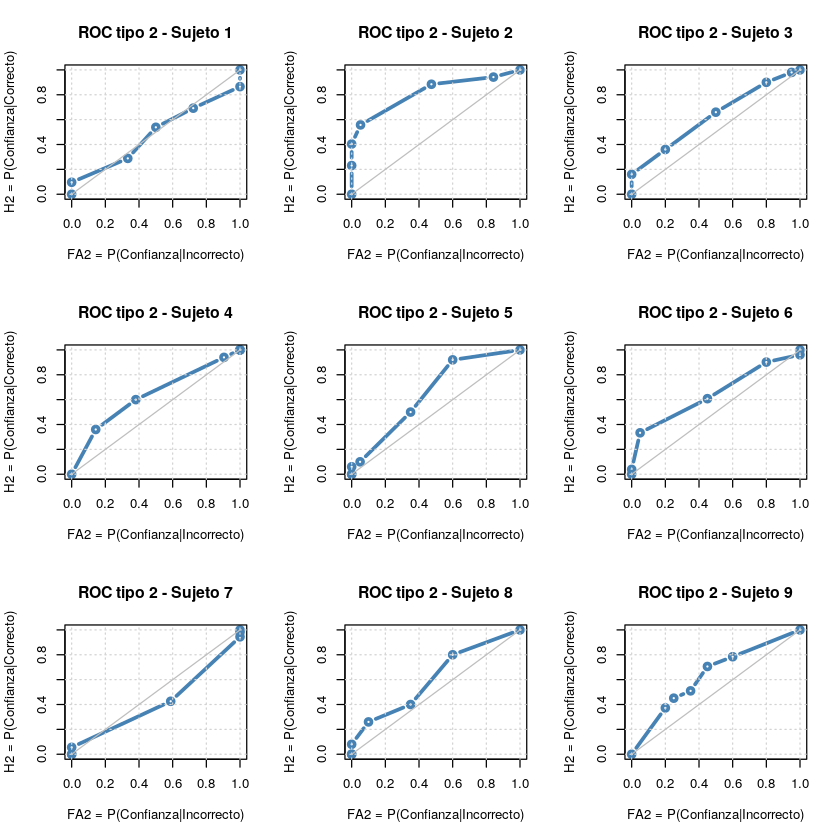

In [8]:
par(mfrow = c(3, 3))
for(i in 1:9){
    for(c in 1:6){
        hi.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == T)
        fa.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == F)
    }
    # Agrego (0,0)
    hi.2[7] <- 0
    fa.2[7] <- 0
    plot(fa.2, hi.2, type='b', lwd=3, col="steelblue", xlim=c(0,1), ylim=c(0,1),
         main=paste("ROC tipo 2 - Sujeto", i),
         xlab="FA2 = P(Confianza|Incorrecto)",
         ylab="H2 = P(Confianza|Correcto)")
    grid()
    lines(x=c(0,1), y=c(0,1), col='gray')
}

### 3. Tercer caso:

Curva ROC2 individualizada **para cada sujeto + promedio de sujetos**.

En este caso, la combinación de las dos visualizaciones anteriores en un mismo gráfico para todos los sujetos, da una idea más informativa de la media y la varianza de la capacidad metacognitiva de todos los sujetos que participaron en este experimento.

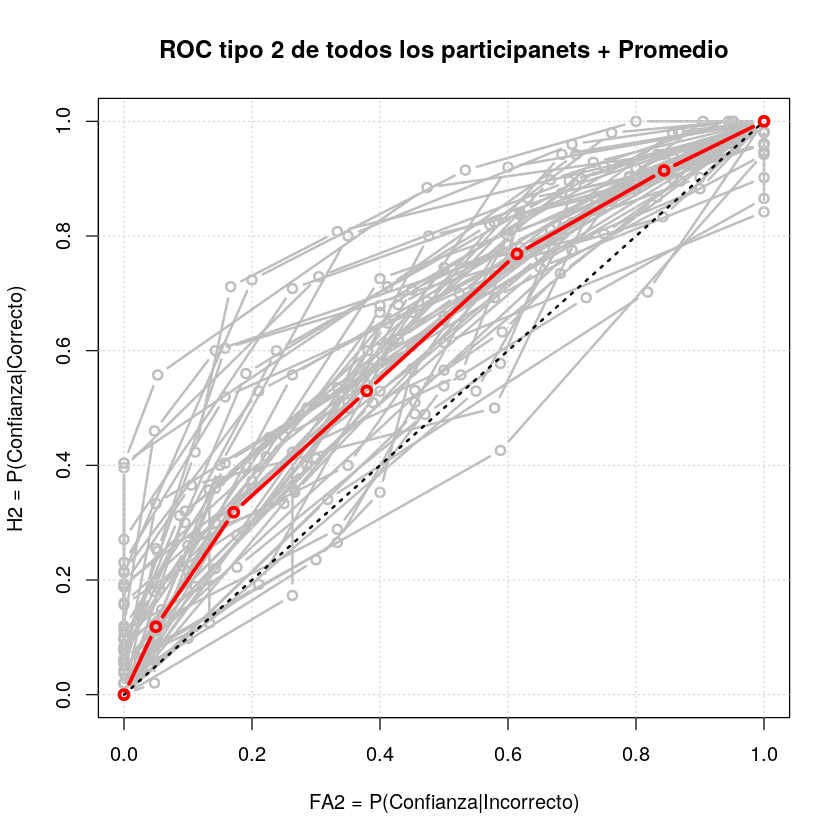

In [9]:
# Dummy plot
plot(x=0, y=0, xlim=c(0,1), ylim=c(0,1), col="white",
     main="ROC tipo 2 de todos los participanets + Promedio",
     xlab="FA2 = P(Confianza|Incorrecto)",
     ylab="H2 = P(Confianza|Correcto)")

# Itero sobre cada uno de los sujetos
for(i in 1:max(datos.clean$subject)){
    for(c in 1:6){
        hi.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == T)
        fa.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == F)
    }
    # Agrego (0,0)
    hi.2[7] <- 0
    fa.2[7] <- 0
    points(fa.2, hi.2, type='b', lwd=2, col="gray", xlim=c(0,1), ylim=c(0,1))
}
grid()
lines(x=c(0,1), y=c(0,1), lwd=2, col='black', lty=3)

# Computo la curva promedio de todos los sujetos
for(c in 1:6){
    hi.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==T)/sum(datos.clean$correct==T)
    fa.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==F)/sum(datos.clean$correct==F)
}
# Agrego (0,0)
hi.2[7] <- 0
fa.2[7] <- 0
points(fa.2, hi.2, type='b', lwd=3, col="red", xlim=c(0,1), ylim=c(0,1))

## Área bajo la curva

Para calcular el área bajo la curva, puedo sumar el área de los distintos trapezoides que componen el area encerrada bajo la curva ROC de tipo 2, como se observa a continuación:

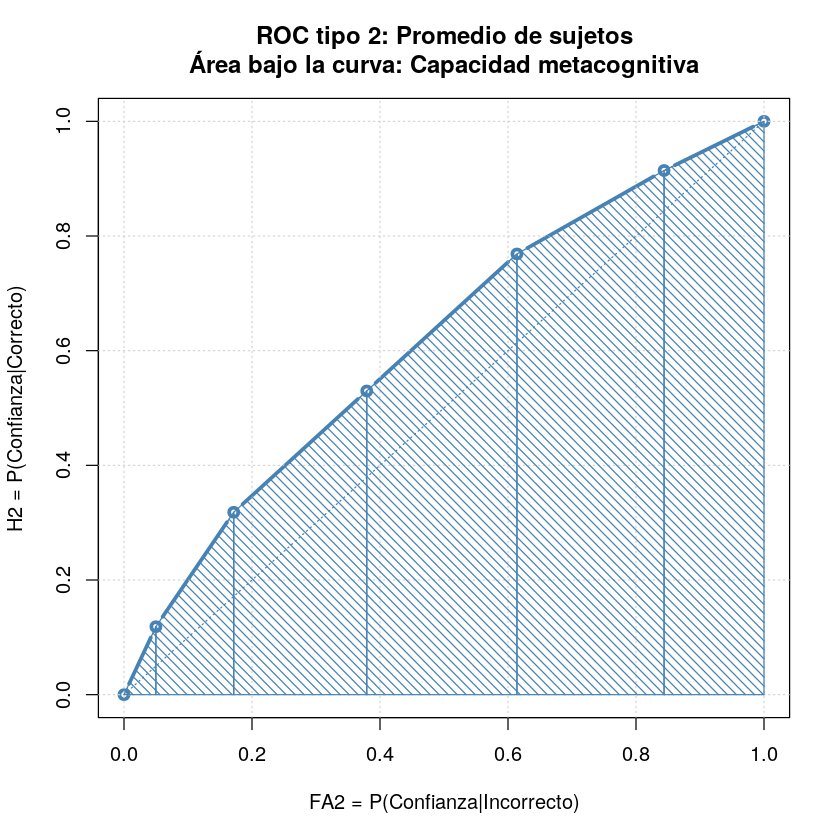

In [10]:
plot(fa.2, hi.2, type='b', lwd=3, col="steelblue", xlim=c(0,1), ylim=c(0,1),
     main="ROC tipo 2: Promedio de sujetos\nÁrea bajo la curva: Capacidad metacognitiva",
     xlab="FA2 = P(Confianza|Incorrecto)", ylab="H2 = P(Confianza|Correcto)")
grid()
lines(x=c(min(fa.2), max(fa.2)), y=c(min(hi.2),max(hi.2)), col='steelblue', lty=3)
polygon(c(fa.2[7:6], fa.2[6:7]), c(hi.2[7:6],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[6:5], fa.2[5:6]), c(hi.2[6:5],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[5:4], fa.2[4:5]), c(hi.2[5:4],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[4:3], fa.2[3:4]), c(hi.2[4:3],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[3:2], fa.2[2:3]), c(hi.2[3:2],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[2:1], fa.2[1:2]), c(hi.2[2:1],0,0), density =20, angle=-45, col="steelblue")

Usando trigonometría básica, podemos calcular el área de cada trapezoide como:

$$\large A_{\text{trape}} = \frac{a+b}{2}h$$

Doned $a$ y $b$ representan las bases paralelas del trapezoide (en nuestro caso, verticales), y $h$ la altura o distancia perpendicular entre los mismos (en nuestro caso, horizontal)

In [11]:
getROCArea <- function(fa.2, hi.2){
    # Calculo y acumulo area de los trapezoides
    # A_tra = (a+b)/2 * h
    area <- 0
    for(i in 7:2){
        height <- fa.2[i-1] - fa.2[i]
        base.a <- hi.2[i]
        base.b <- hi.2[i-1]
        area <- area + (base.a+base.b)/2 * height
    }
    return(area)
}

#### Área del promedio de curvas visualizado arriba:

In [12]:
getROCArea(fa.2, hi.2)

[1] 0.6128666

#### Calculo las areas de las curvas individuales de cada participante

In [13]:
n <- length(unique(datos.clean$subject))
areas <- rep(NA, n)
for(i in 1:max(datos.clean$subject)){
    hi.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == T)
    fa.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == F)
    areas[i] <- getROCArea(fa.2, hi.2)
}

#### Promedio de áreas de todas las curvas

Notar que es muy similar al area de la curva promedio de arriba

In [14]:
mean(areas)

[1] 0.6134019

## Histograma de áreas bajo las curvas ROC 2

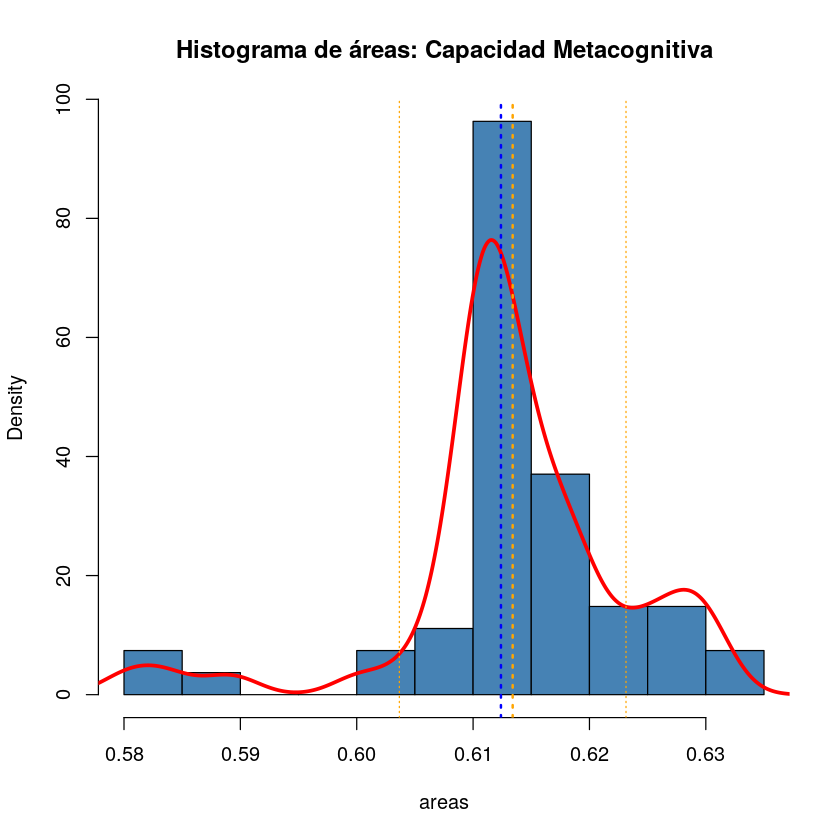

In [15]:
areas <- rep(NA, n)
for(i in 1:n){
    hi.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == T)
    fa.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == F)
    areas[i] <- getROCArea(fa.2, hi.2)
}
hist(areas, breaks=10, col="steelblue", prob=T, main="Histograma de áreas: Capacidad Metacognitiva")
lines(density(areas), col="red", lwd=3)
abline(v=mean(areas), col="orange", lwd=2, lty=3)
abline(v=median(areas), col="blue", lwd=2, lty=3)
abline(v=mean(areas)+sd(areas), col="orange", lty=3)
abline(v=mean(areas)-sd(areas), col="orange", lty=3)

Se observa una gran concentración de la masa del histograma entre los valores 0.60 y 0.63, con muy baja desviación.

Ésto indica que los participantes poseen capacidades metacognitivas "correctamente calibradas", es decir, púeden diferenciar cuándo no tienen certeza sobre una respuesta dada, y cuando sí.

$fin$